In [1]:
# importing libraries    
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import os
import warnings
# Set the environment variable before importing sklearn
os.environ["OMP_NUM_THREADS"] = "2"

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

In [2]:
# Importing the dataset  
dataset = pd.read_csv('Mall_Customers.csv')  

In [3]:
print(dataset)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [4]:
x = dataset.iloc[:, [3, 4]].values

In [5]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

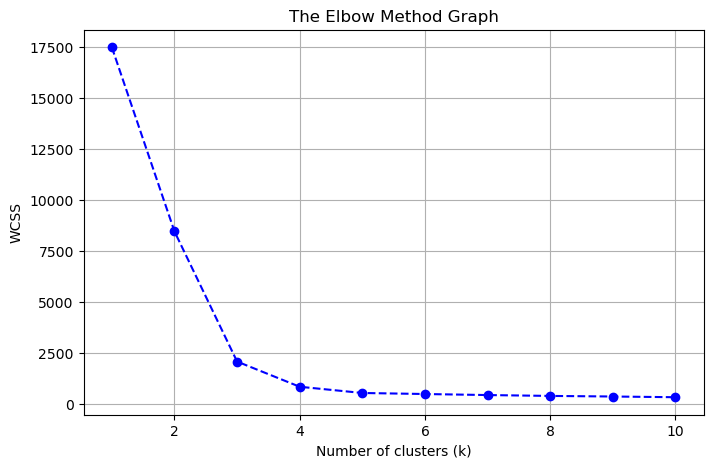

In [6]:
# Creating synthetic data (Replace this with your actual dataset)
x, _ = make_blobs(n_samples=300, centers=5, random_state=42)

# Initializing the list for WCSS (Within-Cluster Sum of Squares)
wcss_list = []

# Using a for loop to apply KMeans with different cluster numbers
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)  # Appending WCSS values

# Plotting the Elbow Method graph
mtp.figure(figsize=(8, 5))
mtp.plot(range(1, 11), wcss_list, marker='o', linestyle='--', color='b')
mtp.title('The Elbow Method Graph')
mtp.xlabel('Number of clusters (k)')
mtp.ylabel('WCSS')
mtp.grid()
mtp.show()

In [7]:
print(wcss_list)

[17504.673093008783, 8476.431874591422, 2096.261994764536, 861.1580192160817, 556.0777625074254, 505.2797675938391, 454.5625063295931, 411.90958523347194, 383.25020434130585, 348.2631258723679]


In [8]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)

In [9]:
print(kmeans)

KMeans(n_clusters=5, random_state=42)


In [10]:
print(y_predict)

[3 0 3 0 3 4 0 2 1 0 0 3 0 3 0 3 0 0 0 3 3 0 3 0 0 3 2 0 0 2 1 0 0 1 2 0 0
 0 4 0 3 0 2 1 0 1 3 2 0 2 4 0 2 1 3 1 0 3 4 2 3 4 0 0 2 0 2 2 2 2 0 2 4 0
 4 3 4 1 0 3 2 3 3 0 3 2 4 0 0 0 0 0 3 0 3 3 0 1 0 0 4 4 0 2 3 3 3 0 3 0 4
 0 0 0 3 3 3 2 4 1 4 2 1 1 3 2 0 0 4 3 0 1 0 3 3 3 3 0 2 0 3 4 3 0 0 3 0 2
 0 2 0 2 2 0 3 0 2 4 3 0 1 1 0 0 3 1 0 0 0 0 2 3 0 0 3 0 4 0 2 2 4 1 0 2 2
 0 3 1 2 0 0 2 3 2 2 1 4 2 0 0 1 2 0 0 1 3 3 2 2 3 2 1 0 2 3 0 1 1 2 0 1 4
 0 4 0 0 1 0 4 0 1 0 0 2 0 0 0 0 0 3 4 0 2 0 2 1 0 0 2 2 0 0 4 2 4 0 2 0 2
 0 2 3 0 0 0 3 0 0 2 0 1 2 2 3 3 4 0 0 0 0 1 3 3 0 0 2 2 2 0 0 4 0 2 4 3 4
 2 3 0 3]


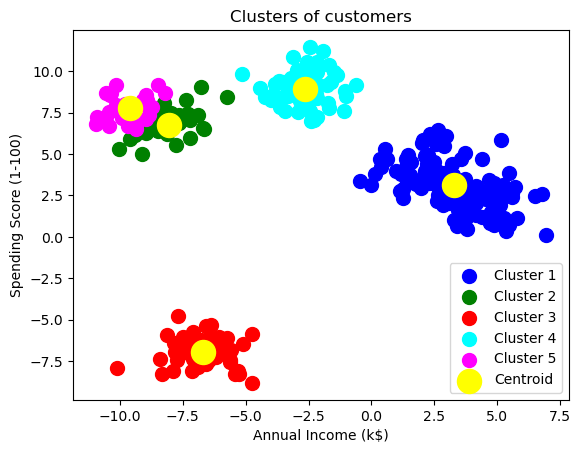

In [11]:
#visulaizing the clusters  
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of customers')  
mtp.xlabel('Annual Income (k$)')  
mtp.ylabel('Spending Score (1-100)')  
mtp.legend()  
mtp.show()  